In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pdb

In [91]:
n_dims = 1


lin_func = lambda x: 15*x + 0.58
x = np.linspace(0, 10, num=50)
y = np.r_[[lin_func(z) for z in x]]

In [126]:
class Lin_cost_func(object):
    """Linear cost function and its derivative"""
    def __init__(self, x,y):
        self.x, self.y = x,y
        
    def __call__(self, f):
        return 1/2.*np.mean( [(f(_x) - _y)**2 for _x,_y in zip(self.x,self.y) ] )
    
    def linear_grad(self, f, params):
        g0 = np.mean( [ f(_x) - _y for _x,_y in zip(x,y)] )
        g1 = np.mean( [ (f(_x) - _y)*_x for _x,_y in zip(x,y)] )
        return np.hstack((g0,g1))

    
class Linear_func(object):
    """Linear function for regression"""
    def __init__(self, n_d = n_dims):
        self.params = np.random.uniform(size = n_d+1)
        self.param_hist = [self.params.copy()]
        self.grad_hist = []
        
    def __call__(self, x):
        return np.dot(self.params[1:], x) + self.params[0]
    
    def fit(self, x, y, lrn_rate = 1e-3, max_iter = 10, fin_accuracy = 1e-3):
        """method for fitting data with gradient descent"""
#         pdb.set_trace()
        x_ = np.insert(x,0,1)
        cost_f = Lin_cost_func(x_,y)
        
        for i in xrange(max_iter):
            grad = cost_f.linear_grad(self, self.params)
            self.params -= lrn_rate * lrn_rate * grad
            if np.linalg.norm(self.param_hist[-1] - self.params) > 1:
                self.param_hist.append(self.params.copy())
            if  np.linalg.norm(self.param_hist[-2] - self.params) < fin_accuracy: 
                self.param_hist.append(self.params.copy())
                print "Aligned on step %d" % i
                break

In [127]:
f1 = Linear_func(1)

In [128]:
res = [f1(z) for z in x]

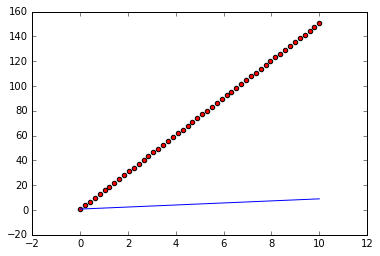

In [129]:
plt.scatter(x,y,c='r')
plt.plot(x,res)

In [144]:
a0 = f1.params.copy()
print "started"
print f1.params
print '_______________________________'
f1.fit(x,y, lrn_rate=0.1, max_iter=10000)
print '_______________________________'
print "finished"
print f1.params

started
[  0.58  15.  ]
_______________________________
_______________________________
finished
[  0.58  15.  ]


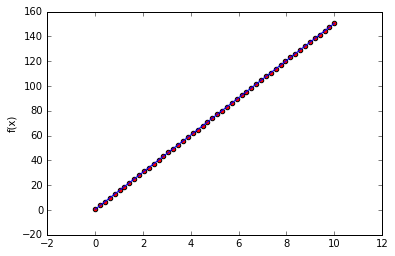

In [131]:
res = [f1(z) for z in x]
plt.scatter(x,y,c='r')
plt.plot(x,res)
plt.ylabel('f(x)')

In [140]:
resolution = 200
eps = np.abs(max(np.ravel(f1.param_hist)))

o_x = np.linspace( f1.params[0]-eps,f1.params[0]+eps, num=resolution)
o_y = np.linspace( f1.params[1]-eps,f1.params[1]+eps, num=resolution)
X, Y = np.meshgrid(o_x, o_y)

CF = Lin_cost_func(x,y)                
linear_f = lambda p0, p1, z: p1*x + p0

Z = np.array([ CF(lambda z: linear_f(p0,p1,z)) for p0 in o_x for p1 in o_y]).reshape(o_x.size,o_y.size)

In [141]:
p0s = [f1.param_hist[i][0] for i in range(len(f1.param_hist))]
p1s = [f1.param_hist[i][1] for i in range(len(f1.param_hist))]

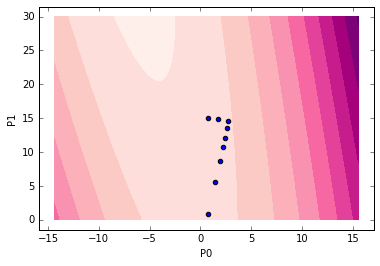

In [143]:
plt.contourf(X, Y, Z, 10,
                  cmap=plt.cm.RdPu,
                  origin='lower')
plt.scatter(p0s, p1s)
plt.xlabel('P0')
plt.ylabel('P1')
plt.show()